# Тестирование гипотез для увеличения выручки интернет-магазина

В проекте требует провести тестирование гипотез для увеличения выручки интернет-магазина. В первой части нужно приоритизировать гипотезы с помощью фреймворков ICE и RICE. Затем нужно проанализировать результаты проведенного A/B-теста и сделать выводы о его эффективности и целесообразности продолжения.

## Содержание

[Часть 1. Приоритизация гипотез](#step1)  
[Часть 2. Анализ A/B-теста](#step2)  
   - [Загрузка и подготовка данных](#substep1)  
   - [Расчет кумулятивной выручки, среднего чека и конверсии по группам](#substep2)  
   - [Анализ выбросов](#substep3)  
   - [Сравнение групп A и B по сырым и очищенным данным](#substep4)  
   
[Общий вывод](#step3)

## Часть 1. Приоритизация гипотез <a id='step1'></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from scipy import stats as st
from IPython.display import display

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
hypotheses = pd.read_csv(r'hypothesis.csv')

In [3]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


В таблице содержатся 9 гипотез, оцененных по 4 параметрам по 10-балльной шкале. Оценим их с помощью фреймворков ICE и RICE.

In [4]:
hypotheses['ICE'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Efforts']
hypotheses['RICE'] = hypotheses ['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Efforts']

In [5]:
hypotheses.sort_values(['ICE'], ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.00
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.00
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.00
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.00


In [6]:
hypotheses.sort_values(['RICE'], ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.00
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.00


In [7]:
hypotheses['Hypothesis'].values

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Как видно, оценка гипотез по показателям ICE и RICE различаются. С точки зрения первой метрики, наилучшими являются гипотезы 8, и 0, которые очень сильно повлияют на затронутых пользователей (например, позволят привлечь совершенно новых клиентов), средне сложны в реализации, причем мы очень уверены в их эффективности. В то же время, они имеют относительно невысокий охват пользователей (новые канала трафика касаются только тех, кто придет благодаря им, а акции в день рождения актуальны для каждого пользователя буквально один раз в год), поэтому их рейтинг с точки зрения RICE ниже. С другой стороны, гипотеза 7 - добавление формы подписки на все страницы сайта - также оценивается достаточно высоко с точки зрения ICE (на третьем месте), однако ее реализация коснется всех пользователей нашего сайта, а потому по показателю RICE она лидирует с очень большим отрывом. На втором месте (с разницей вдвое) находится гипотеза 2 - добавить блоки рекомендаций - она относительно проста в реализации, имеет большой охват, однако относительно небольшое предполагаемое влияние на опыт пользователей.

## Часть 2. Анализ A/B-теста <a id='step2'></a>

### Загрузка и подготовка данных <a id='substep1'></a>

In [8]:
orders = pd.read_csv(r'orders.csv')

In [9]:
orders.info()
display(orders.head())
print(f'Количество дубликатов: {orders.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Количество дубликатов: 0


Пропусков нет, дубликатов нет. Заменим типы данных на `str` в столбцах с ID и на `datetime` - в столбце с датой, а также названия столбцов на более удобные.

In [10]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders = orders.astype({'transaction_id': 'str', 'visitor_id': 'str', 'date': 'datetime64'})

In [11]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   object        
 1   visitor_id      1197 non-null   object        
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 46.9+ KB


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
visitors = pd.read_csv(r'visitors.csv')

In [13]:
visitors.info()
display(visitors.head())
print(f'Количество дубликатов: {visitors.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Количество дубликатов: 0


Аналогично, пропусков и дубликатов нет, тип данных в столбце `date` заменим на `datetime`.

In [14]:
visitors['date'] = visitors['date'].astype('datetime64')

In [15]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Расчет кумулятивной выручки, среднего чека и конверсии по группам <a id='substep2'></a>

Для начала создадим таблицу `cum_data`, в которой были бы сведены кумулятивные выручка, число пользователей и число покупателей по группам, на основе этих показателей рассчитаем и построим графики кумулятивной конверсии и среднего чека.

In [16]:
dates_groups = orders[['date', 'group']].drop_duplicates() # массив уникальных пар значений группы и даты

In [17]:
# для каждой пары "группа-дата" находим общее число пользователей и покупок, а также суммарный доход из тех строк 
# таблицы orders, которые относятся к той же группе и имеют не большую дату

orders_agg = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                .agg({'date': 'max', 'group': 'max', 'visitor_id': 'nunique', 'transaction_id': 'nunique', 
                                  'revenue': 'sum'}), axis=1).sort_values(['date', 'group'])

In [18]:
orders_agg.head()

,date,group,visitor_id,transaction_id,revenue
55,2019-08-01,A,20,24,148579
66,2019-08-01,B,20,21,101217
175,2019-08-02,A,38,44,242401
173,2019-08-02,B,43,45,266748
291,2019-08-03,A,62,68,354874


In [19]:
# аналогичным образом ищем кумулятиное число посетителей для каждой пары "группа-дата" 

visitors_agg = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                  .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1).sort_values(['date', 'group'])                                  

In [20]:
visitors_agg.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [21]:
# объединим два таблицы и переименуем столбцы для удобства
cum_data = orders_agg.merge(visitors_agg, on=['date', 'group']).rename(columns={'visitor_id': 'buyers', 
                                                                                'transaction_id': 'purchases'})

In [22]:
# добавим столбцы с конверсией и средним чеком, а также поделим его на две части по группам
cum_data['avg_check'] = cum_data['revenue'] / cum_data['purchases']
cum_data['conversion'] = cum_data['purchases'] / cum_data['visitors']
cum_data_a = cum_data[cum_data['group'] == 'A']
cum_data_b = cum_data[cum_data['group'] == 'B']
cum_data_ab = cum_data_a.merge(cum_data_b, on='date', suffixes=['_a', '_b'])

In [23]:
cum_data_a.head()

,date,group,buyers,purchases,revenue,visitors,avg_check,conversion
0,2019-08-01,A,20,24,148579,719,6190.79,0.03
2,2019-08-02,A,38,44,242401,1338,5509.11,0.03
4,2019-08-03,A,62,68,354874,1845,5218.74,0.04
6,2019-08-04,A,77,84,425699,2562,5067.85,0.03
8,2019-08-05,A,100,109,549917,3318,5045.11,0.03


In [24]:
cum_data_b.head()

,date,group,buyers,purchases,revenue,visitors,avg_check,conversion
1,2019-08-01,B,20,21,101217,713,4819.86,0.03
3,2019-08-02,B,43,45,266748,1294,5927.73,0.03
5,2019-08-03,B,59,61,380996,1803,6245.84,0.03
7,2019-08-04,B,75,78,489567,2573,6276.50,0.03
9,2019-08-05,B,98,101,581995,3280,5762.33,0.03


In [25]:
cum_data_ab.head()

,date,group_a,buyers_a,purchases_a,revenue_a,visitors_a,avg_check_a,conversion_a,group_b,buyers_b,purchases_b,revenue_b,visitors_b,avg_check_b,conversion_b
0,2019-08-01,A,20,24,148579,719,6190.79,0.03,B,20,21,101217,713,4819.86,0.03
1,2019-08-02,A,38,44,242401,1338,5509.11,0.03,B,43,45,266748,1294,5927.73,0.03
2,2019-08-03,A,62,68,354874,1845,5218.74,0.04,B,59,61,380996,1803,6245.84,0.03
3,2019-08-04,A,77,84,425699,2562,5067.85,0.03,B,75,78,489567,2573,6276.50,0.03
4,2019-08-05,A,100,109,549917,3318,5045.11,0.03,B,98,101,581995,3280,5762.33,0.03


Построим необходимые графики. 

In [26]:
# функции для постоения графиков показателей групп A и B и относительных показателей
def cum_plot(column=str, name=str, ylabel=str):
    plt.figure(figsize=(12,9))
    plt.plot(cum_data_a['date'], cum_data_a[column], label='A')
    plt.plot(cum_data_b['date'], cum_data_b[column], label='B')
    plt.legend(title='Группа')
    plt.title(f'{name} по группам')
    plt.xlabel('Дата')
    plt.grid()
    plt.ylabel(ylabel);
    
def cum_rel_plot(column=str, name=str, ylabel=str):
    plt.figure(figsize=(12,9))
    plt.plot(cum_data_ab['date'], cum_data_ab[f'{column}_b'] / cum_data_ab[f'{column}_a'] - 1 )
    plt.title(f'Прирост {name} в группе B относительно группы A')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Дата')
    plt.grid()
    plt.ylabel(ylabel);

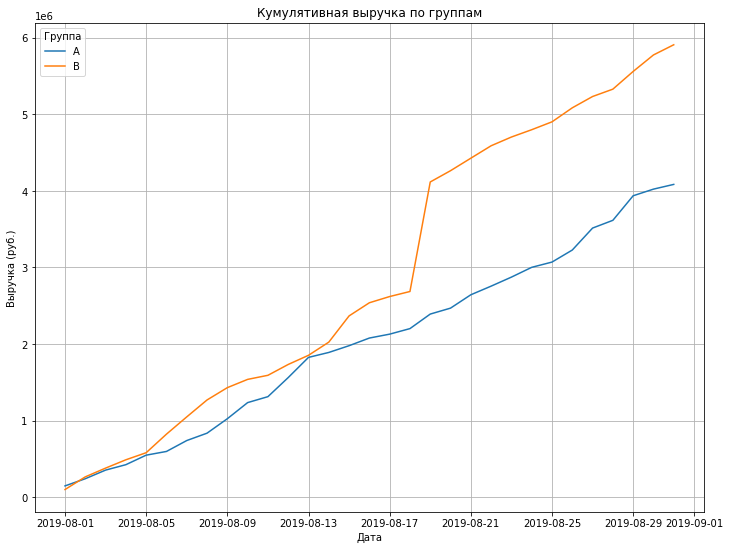

In [27]:
cum_plot('revenue', 'Кумулятивная выручка', 'Выручка (руб.)')

В течение всего периода выручка в обеих группах достаточно равномерно растет (что не может не радовать), причем в группе B она стабильно выше. В группе B наблюдается единоразовый резкий рост кумулятивной выручки, что, вероятно, связано с выбросом - одним или несколькими необычно дорогими заказами. После этого графики по-прежнему примерно параллельны - выручка растет в обеих группах примерно одинаково. В группе A таких резких пиков нет, однако в районе 13 августа также наблюдается заметный рост - рафики в этом месте сходятся.

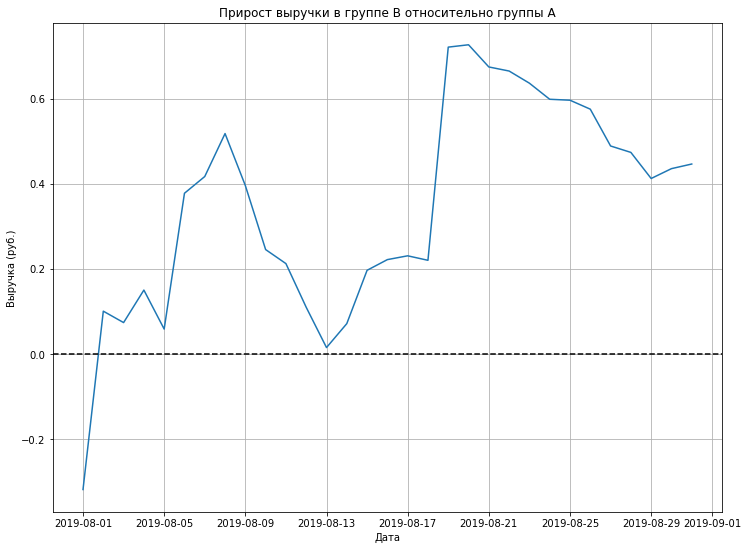

In [28]:
cum_rel_plot('revenue', 'выручки', 'Выручка (руб.)')

Как уже отмечалось, выручка в группе B достаточно стабильно превышает выручку в группе A: в самом начале теста выручка в группе A была выше, однако уже через пару дней группа B "обогнала" группу А примерно на 10%. В первой половине августа относительный доход от группы B достаточно резко вырос, а к 13 августа снизился почти до нуля (возможно, здесь были необычно дорогие покупки в той или другой группе). Отметим также скачкообразный рост во второй половине августа, который хорошо виден и на этом, и на предыдущем графике.

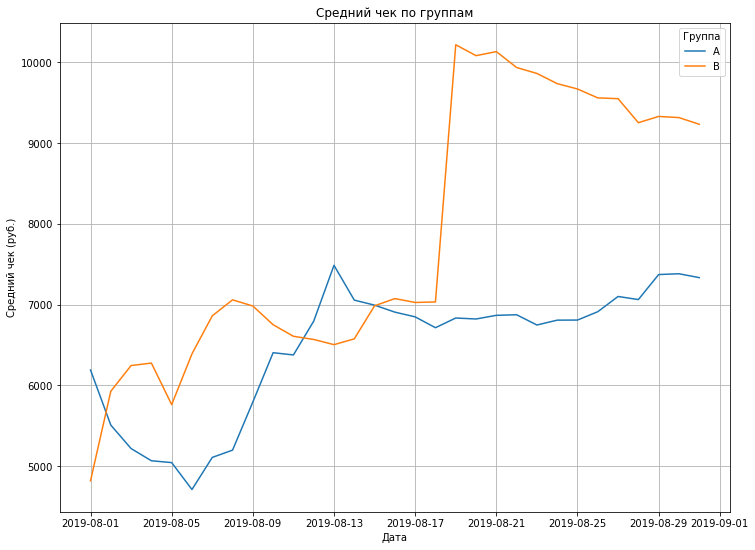

In [29]:
cum_plot('avg_check', 'Средний чек', 'Средний чек (руб.)')

Средний чек сильно колеблется в первой половине теста, и относительно стабилизирует во второй, причем в каждой группе значения во второй половине теста выше, чем в первой. Мы видим скачки в сумме среднего чека, соответствующие пикам на графиках кумулятивной выручки (что убеждает нас в том, что они объясняются выбросами). Заметим также, что во второй половине теста сумма среднего чека в двух группах поспетенно сближается - группе B "сглаживается" эффект от выброса, в группе А показатель растет.

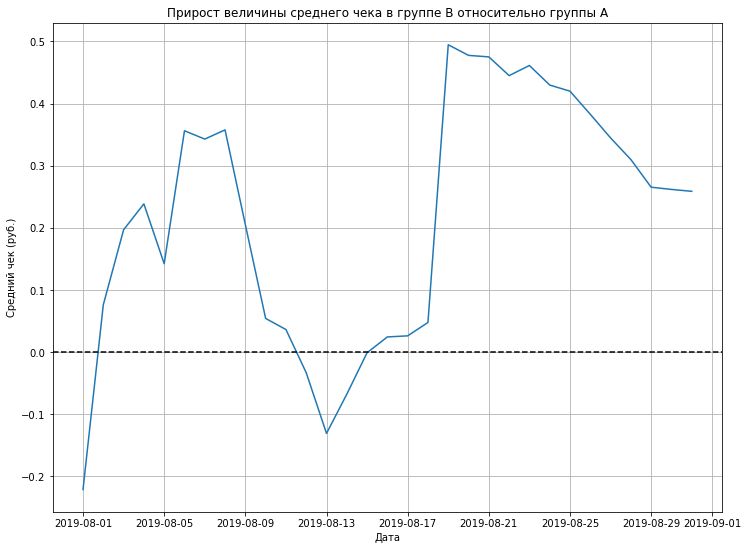

In [30]:
cum_rel_plot('avg_check', 'величины среднего чека', 'Средний чек (руб.)')

Средний чек в группе B в целом выше, чем в группе A. Не считая начального периода, хотя соотношение колеблется на протяжении всего периода. На графике хорошо виден уже отмеченный выброс в группе А 13 августа и в группе B - 21 августа. "Сближение" средних чеков к концу периода хорошо видно на этом графике. После выброса в конце теста величина чека в группе B относительно группы A в целом заметно снижается.

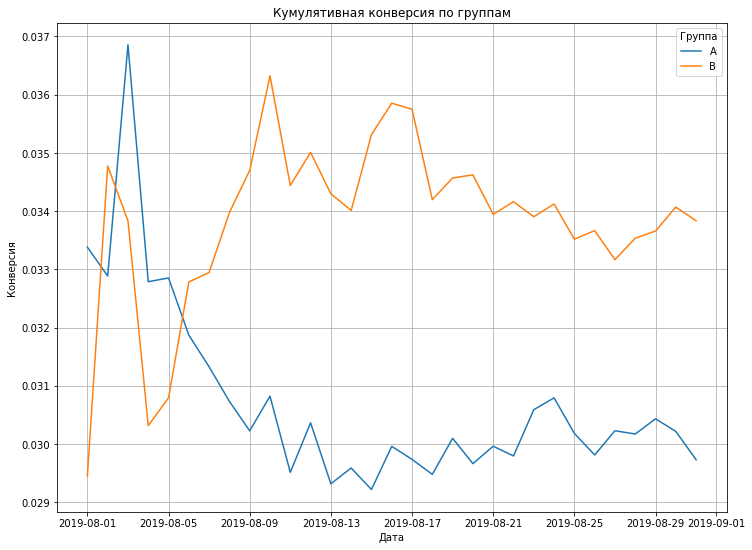

In [31]:
cum_plot('conversion', 'Кумулятивная конверсия', 'Конверсия')

Конверсия сильно колеблется в начале периода, затем группа B заметно вырывается вперед. Группа A ко второй неделе теста стабилизируется на показателях 2.7-2.8%, группа B колеблется в основном между значениями 3.1-3.4%, к последней трети периода показатель более-менее стабилизируется на значениях около 3.1%.

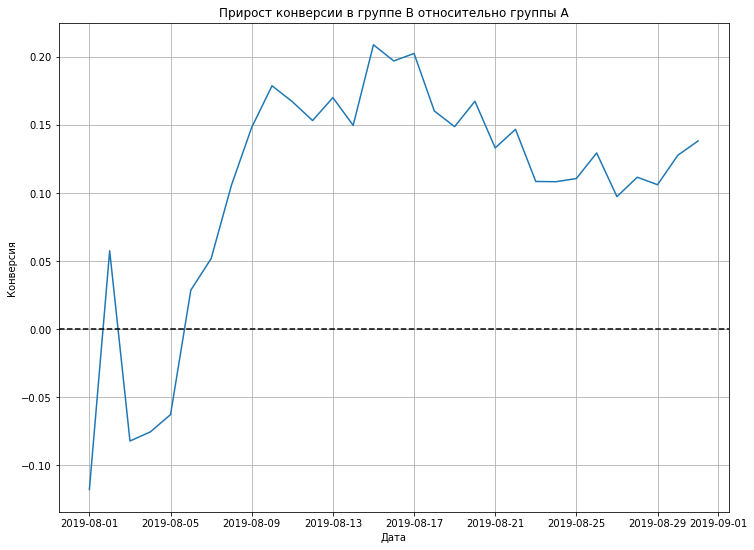

In [32]:
cum_rel_plot('conversion', 'конверсии', 'Конверсия')

Этот график достаточно наглядно демонстрирует тенденции, отмеченные на графике конверсий: после первых нескольких дней теста конверсия в группе B превосходит конверсию в группе A на 10-20%. К последней трети теста преимущество группы B устанавливается на уровне 10-15%.  
На первый взгляд, по всем рассмотренным метрикам группа B превосходит группу A, однако необходимо выяснить, имеют ли различия статистическую значимость и насколько на них влияют выбросы. Для этого сначала проанализируем количество покупок и величины заказов, чтобы определить, есть ли в них выбросы и исключить их.

### Анализ выбросов <a id='substep3'></a>

In [33]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [34]:
orders_num = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})\
                    .sort_values('transaction_id', ascending=False)

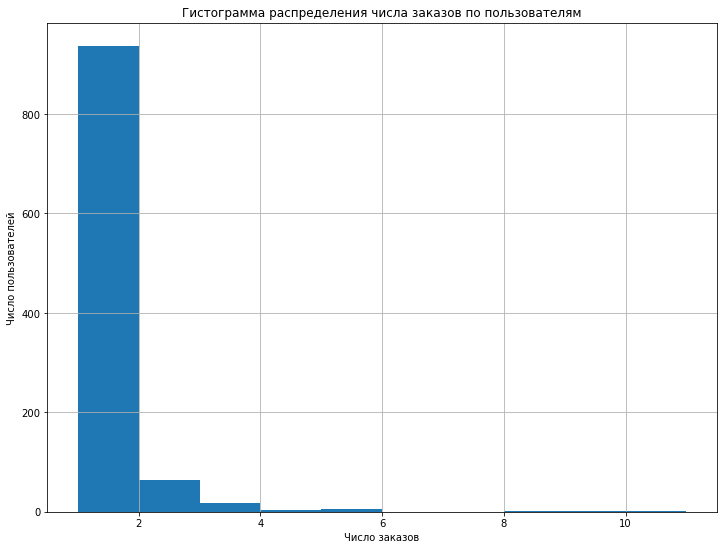

In [35]:
orders_num.hist(figsize=(12,9))
plt.xlabel('Число заказов')
plt.ylabel('Число пользователей')
plt.title('Гистограмма распределения числа заказов по пользователям');

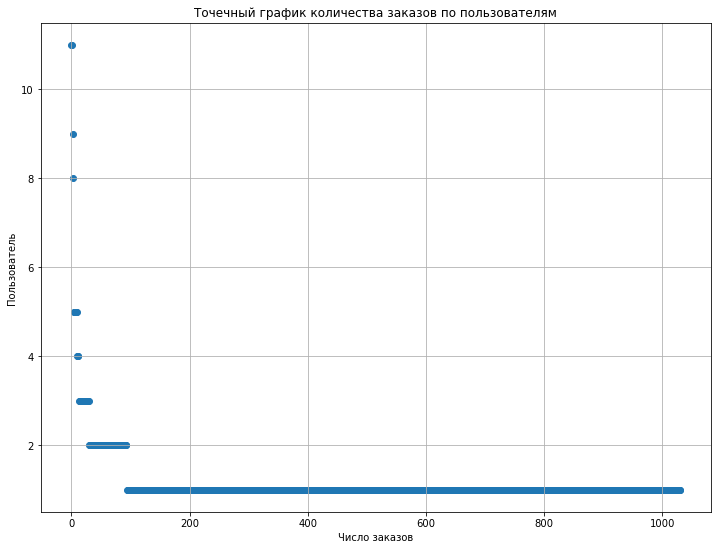

In [36]:
x = pd.Series(np.arange(0,len(orders_num)))

plt.figure(figsize=(12,9))
plt.scatter(x, orders_num['transaction_id'])
plt.xlabel('Число заказов')
plt.ylabel('Пользователь')
plt.grid()
plt.title('Точечный график количества заказов по пользователям');

Абсолютное большинство покупавших пользователей делали одну покупку. Кроме того, у нас есть некоторое количество пользователей, покупавших от 2 до четырех раз. Число пользобателей с большим числом покупок (до 11 включительно) крайне невелико - это единичные случаи. Для более точной оценки рассчитаем 90, 95 и 99 перцентили.

In [37]:
print(np.percentile(orders_num['transaction_id'], [90, 95, 99]))

[1. 2. 4.]


90% пользователей делают одну покупку, 95% пользователей - две покупки, 99% - четыре и более покупок. Будем считать  считать "нормальными" тех пользователей, которые покупали не более четырех раз, остальных отнесем к выбросам.

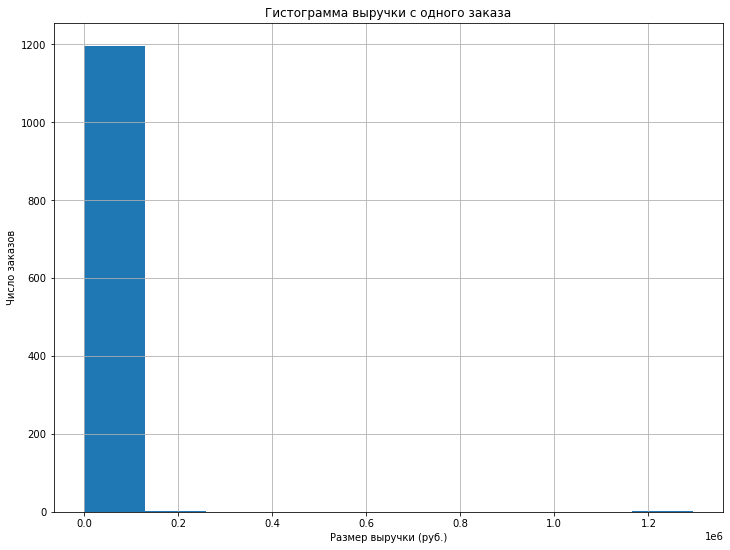

In [38]:
orders['revenue'].hist(figsize=(12,9))
plt.xlabel('Размер выручки (руб.)')
plt.ylabel('Число заказов')
plt.title('Гистограмма выручки с одного заказа');

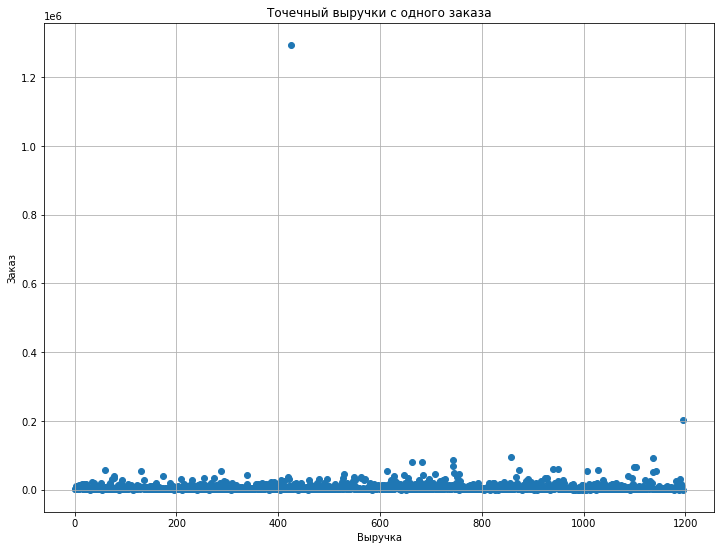

In [39]:
x = pd.Series(np.arange(0,len(orders)))

plt.figure(figsize=(12,9))
plt.scatter(x, orders['revenue'])
plt.xlabel('Выручка')
plt.ylabel('Заказ')
plt.grid()
plt.title('Точечный выручки с одного заказа');

Большая часть заказов стоит не более 100 тысяч рублей, однако есть два очевидных выброса - заказы стоимостью примерно 200 тысяч и более 1,2 миллиона. Рассчитаем 90, 95 и 99 перцентили для определения выбросов.

In [40]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


In [41]:
orders[orders['revenue'] > 58000]

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
662,1811671147,4266935830,2019-08-29,78990,A
682,1216533772,4266935830,2019-08-29,78990,B
743,3603576309,4133034833,2019-08-09,67990,A
744,3668308183,888512513,2019-08-27,86620,B
858,192721366,1316129916,2019-08-27,93940,A
873,2519737434,4256040402,2019-08-08,58220,B
940,2420050534,4003628586,2019-08-08,58550,B
949,1347999392,887908475,2019-08-21,60450,A
1029,469609643,2378935119,2019-08-10,58220,A


Выручка от 90% заказов не больше 18168 рублей, 95% - не больше 28 тысяч рублей, 99% - не больше 58233 рублей. Будем считать границей "нормальности" 99-й перцентиль. Соберем всех необычных пользователей в один массив.

In [42]:
abnormal_users = pd.concat([orders_num[orders_num['transaction_id'] > 4]['visitor_id'], 
                           orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']], 
                           axis=0).drop_duplicates()
abnormal_users

866     4256040402
385     2458001652
361     2378935119
270     2038680547
557     3062433592
746     3803269165
726     3717692402
359      237748145
57      1230306981
258      199603092
425     1920142716
662     4266935830
743     4133034833
744      888512513
858     1316129916
940     4003628586
949      887908475
1099     148427295
1103    1164614297
1136    1307669133
1196    2108080724
Name: visitor_id, dtype: object

In [43]:
len(abnormal_users)

21

Таким образом, у нас 20 "ненормальных" пользователей. Для определения того, как они влияют на оценку рельзультатов A/B-теста, проведем два расчета статистической значимости различий между группами A и B  - на сырых данных и с удаленными выбросами.

### Сравнение групп A и B (по сырым и "очищенным" данным) <a id='substep4'></a>

#### Статистический тест по сырым данным

Для сравнения выборок A и B и определения статистической значимости различий между ними применим критерий Манна-Уитни, поскольку, как мы видели выше, данные в выборках имеют выбросы, которые могут исказить результаты параметрических тестов. Критический уровень статистической значимости установим равным 0.05. Нулевая гипотеза: различий между двумя группами нет, альтернативная гипотеза: две группы значимо отличаются.  
Для анализа конверсии сформируем две выборки (соответствующие двум группам), состоящие из числа покупок для каждого покупателя и нулевого числа покупок - для каждого пользователя, не совершившего покупки. Среднее арифметическое в каждой из этих выборок будет представлять собой среднюю конверсию для каждой группы (сумма покупок, деленная на число пользователей). 

In [44]:
buyers_a = orders.query('group == "A"').groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
buyers_b = orders.query('group == "B"').groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})

In [45]:
visitors_per_date = visitors[visitors['group']=='A'].merge(visitors[visitors['group']=='B'], on='date', suffixes=['_a', '_b'])

In [46]:
sample_a = pd.concat([buyers_a['transaction_id'],
                     pd.Series(0, index=np.arange(visitors_per_date['visitors_a'].sum() 
                                                  - len(buyers_a['transaction_id'])))],axis=0)

sample_b = pd.concat([buyers_b['transaction_id'],
                     pd.Series(0, index=np.arange(visitors_per_date['visitors_b'].sum() 
                                                  - len(buyers_b['transaction_id'])))],axis=0)

In [47]:
print('p-значение: {0:.3f}'.format(st.mannwhitneyu(sample_a, sample_b)[1]))
print('Относительный прирост конверсии в группе B: {0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1)) 

p-значение: 0.008
Относительный прирост конверсии в группе B: 0.138


Поскольку p-значение меньше 0.05, мы можем отвергнуть нулевую гипотезу и утверждать, что, судя по сырым данным, различия между группами A и B статистически значимы, прирост конверсии в группе B составил 13.8%. 

Сравним средний чек пользователей из двух групп. Для этого с помощью теста Манна-Уитни (по соображениям аналогичным приведенным выше) проверим, есть ли статистически значимая разница в размерах заказов между двумя группами, а также рассчитаем прирост среднего чека (то есть среднего арифметического сумм заказов) в группе B относительно группы A. Нулевая гипотеза для статистического теста: различий между двумя выборками нет, альтернативная гипотеза: две выборки значимо различаются. Примем критический уровень значимости равным 0.05.

In [48]:
print('p-значение: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                   orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека в группе B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean() 
                                                                       / orders[orders['group']=='A']['revenue'].mean() - 1)) 

p-значение: 0.365
Относительный прирост среднего чека в группе B: 0.259


Поскольку p-значение значительно больше 0.05, мы не можем отвергнуть нулевую гипотезу, следовательно, статистически значимых отличий между двумя группами на основании сырых данных выявить не удалось.

#### Статистический тест по "очищенным" данным

Сравним группы A и B без учета "аномальных" пользователей. В остальном тесты (включая нулевые и альтернативные гипотезы) аналогичны описанным выше.

In [49]:
pure_sample_a = pd.concat([buyers_a[~buyers_a['visitor_id'].isin(abnormal_users)]['transaction_id'],
                     pd.Series(0, index=np.arange(visitors_per_date['visitors_a'].sum() 
                                                  - len(buyers_a['transaction_id'])))],axis=0)

pure_sample_b = pd.concat([buyers_b[~buyers_b['visitor_id'].isin(abnormal_users)]['transaction_id'],
                     pd.Series(0, index=np.arange(visitors_per_date['visitors_b'].sum() 
                                                  - len(buyers_b['transaction_id'])))],axis=0)

In [50]:
print('p-значение: {0:.3f}'.format(st.mannwhitneyu(pure_sample_a, pure_sample_b)[1]))
print('Относительный прирост конверсии в группе B: {0:.3f}'.format(pure_sample_b.mean() / pure_sample_a.mean() - 1)) 

p-значение: 0.007
Относительный прирост конверсии в группе B: 0.154


При анализе "очищенных" данных p-значение также меньше 0.05 (и даже меньше, чем значение на сырых данных), что говорит о наличии статистически значимых различий между двумя выборками. Относительный прирост конверсии даже выше, чем полученный на сырых данных, - 15.6%, так что можно вполне уверенно утверждать, что группа B имеет лучшую конверсию, чем группа A.

In [51]:
print('p-значение: {0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group']=='A',
                                                                        ~orders['visitor_id'].isin(abnormal_users))]['revenue'], 
                                                   orders[np.logical_and(orders['group']=='B',
                                                                        ~orders['visitor_id'].isin(abnormal_users))]['revenue'])[1]))
print('Относительный прирост среднего чека в группе B: {0:.3f}'.format(orders[np.logical_and(orders['group']=='B',
                                                                        ~orders['visitor_id'].isin(abnormal_users))]['revenue'].mean() 
                                                                       / orders[np.logical_and(orders['group']=='A',
                                                                        ~orders['visitor_id'].isin(abnormal_users))]['revenue'].mean() - 1)) 

p-значение: 0.479
Относительный прирост среднего чека в группе B: -0.014


В данном случае результаты теста по "очищенным" данным в главном также не отличаются от результатов теста по "сырым" данным: высокое p-значение не позволяет утверждать, что выборки значимо различаются, более того, p-значение стало еще больше, а разница в среднем значении теперь в пользу группы A (хотя она и крайне мала). Такой результат можно было предполагать, учитывая, что два самых больших выброса в нашей выборке относятся к выборке B, причем они настолько велики, что отчетливо видны даже на общих графиках. Так что удаление выбросов должно было сильнее повлиять на группу B и значительно "сблизить" выборки, что и проявилось в существенном росте p-значения и фактически исчезновении разницы между средними.

## Общий вывод <a id='step3'></a>

Анализ результатов A/B-теста показал:
1. В группе B конверсия в среднем выше примерно на 15%, и эта разница статистически значима.
2. Статистически значимых различий в среднем чеке в обеих группах нет, а те различия, которые наблюдаются на общих графиках, объясняются единичными выбросами.
3. Динамика показателей в течение теста такова, что ожидать существенных перемен в этой картине не приходится: конверсия и средний чек вначале значительно колебались, однако ко второй половине месяца они относительно стабилизировались. 
4. Таким образом, рекомендуется закончить тест и признать "победу" группы B, то есть проверяемая гипотеза эффективна благодаря тому, что позволяет заметно повысить конверсию.